# CoastSeg Prototype 3: Extract Coastline Vector within Bounding Box
- Author: Sharon Fitzpatrick
- Date: 1/6/2022

## Description
This prototype is meant to showcase how to use a bounding box to select a portion of geojson representing the coastline.

## The Workflow
1. The user draws a bounding box
2. The user runs the code to download the coastline vector
3. The user runs the rest of the code to clip the coastline geojson to the bounding box
4. The user runs the code to add the coastline within the bounding box to the map. (The coastline will be in yellow)

# Get the Bounding Box Geojson
## Directions
1. Use the square drawing button to draw a bounding box somewhere along the coast

In [1]:
from ipyleaflet import DrawControl
import leafmap
from ipyleaflet import Map, Polygon
from ipywidgets import Layout


# Empty list to hold all the polygons drawn by the user
shapes_list=[]

# Disable polyline, circle, and rectangle 
m = leafmap.Map(draw_control=False,measure_control=False, fullscreen_control=False, attribution_control=True,center=( 36.46098029888645, -121.9725021429323), zoom=3, layout=Layout(width='100%', height='100px'))

draw_control = DrawControl()

draw_control.polyline = {}
draw_control.circlemarker = {}
# Custom styles for polygons and rectangles
draw_control.polygon = {
    "shapeOptions": {
        "fillColor": "green",
        "color": "green",
        "fillOpacity": 0.2,
        "Opacity": 0.2
    },
    "drawError": {
        "color": "#dd253b",
        "message": "Ops!"
    },
    "allowIntersection": False,
    "transform":True
}

draw_control = DrawControl()
draw_control.rectangle = {
    "shapeOptions": {
        "fillColor": "green",
        "color": "green",
        "fillOpacity": 0.1,
        "Opacity": 0.1
    },
    "drawError": {
        "color": "#dd253b",
        "message": "Ops!"
    },
    "allowIntersection": False,
    "transform":True
}


# Each time a polygon is drawn it is appended to the shapeslist which is used to create the bounding box
def handle_draw(target, action, geo_json):
    if draw_control.last_action == 'created'and draw_control.last_draw['geometry']['type']=='Polygon' :
        shapes_list.append( draw_control.last_draw['geometry'])
    print("\nshapes_list: ",shapes_list)

draw_control.on_draw(handle_draw)
m.add_control(draw_control)

m


Map(center=[36.46098029888645, -121.9725021429323], controls=(ZoomControl(options=['position', 'zoom_in_text',…

# More Widgets
1. Location of super bounding box from geojson
    A textarea that is used to hold the geojson of the bounding box
2. Size of the polygon ROI's
    The size of the polygons generated along the coast line vector can be manipulated with a slider
3. Percent Overlap
    The percentage of overlap between polygons generated along the coast line vector can be manipulated with a slider
4. Interval of ROI generation
    The distance between polygons that are generated along the coast line vector

In [2]:
import ipywidgets as widgets
from ipywidgets import  Layout
style = {'description_width': 'initial'}

# Slider for the number of polygons to generate
# Not currently implement as of 1/3/2022
interval_slider=widgets.IntSlider(
    value=7,
    min=1,
    max=10,
    step=1,
    description='Interval for Polygon Generation(m):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style=style,
    layout=Layout(width='45%', height='30px')
)

# Slider for the size of the polygons to generate
size_slider=widgets.FloatSlider(
    value=0.00005,
    min=0.00005,
    max=0.0002,
    step=0.00001,
    description='Polygon Size:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.5f',
)

# Slider for the size of the polygons to generate
# Not currently implement as of 1/3/2022
overlap_percent_slider=widgets.FloatSlider(
    value=0.0,
    min=0.0,
    max=0.5,
    step=0.01,
    description='% Overlap:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

# Textarea to hold the geojson of the bounding box
# Not currently implement as of 1/3/2022
bounding_box_geojson=widgets.Textarea(
    value="{\'type\':\'Polygon\', \'coordinates\': [[[-121.929078, 36.459534], [-121.929078, 36.463013], [-121.926211, 36.463013], [-121.926211, 36.459534], [-121.929078, 36.459534]]]}",
    placeholder='Type something',
    description='BBox GeoJson:',
    disabled=False,
    layout=Layout(width='50%', height='80px')
    , style=style
)


display(interval_slider)
display(size_slider)
display(overlap_percent_slider)
display(bounding_box_geojson)

# Set the polygon's size to the slider's value
polygon_size= size_slider.value
m

IntSlider(value=7, continuous_update=False, description='Interval for Polygon Generation(m):', layout=Layout(h…

FloatSlider(value=5e-05, continuous_update=False, description='Polygon Size:', max=0.0002, min=5e-05, readout_…

FloatSlider(value=0.0, continuous_update=False, description='% Overlap:', max=0.5, step=0.01)

Textarea(value="{'type':'Polygon', 'coordinates': [[[-121.929078, 36.459534], [-121.929078, 36.463013], [-121.…

Map(center=[36.46098029888645, -121.9725021429323], controls=(ZoomControl(options=['position', 'zoom_in_text',…


shapes_list:  [{'type': 'Polygon', 'coordinates': [[[-124.035519, 34.845367], [-124.035519, 38.869652], [-120.255742, 38.869652], [-120.255742, 34.845367], [-124.035519, 34.845367]]]}]


# Clip the Bounding Box and Vector
---

### Convert geojson array containing the bounding box to a geopandas geodataframe
https://gis.stackexchange.com/questions/343725/convert-geojson-to-geopandas-geodataframe
https://shapely.readthedocs.io/en/stable/manual.html#:~:text=shapely.geometry.shape(context,copied%20from%20the%20context.

- We also will convert the bounding box geodataframe's crs to the same one as the coastline we will download below.

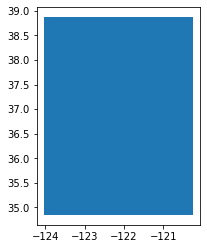

In [10]:
from shapely.geometry import shape
import geopandas as gp
if not shapes_list == []:
    geom = [shape(i) for i in shapes_list]
    geojson_bbox=gp.GeoDataFrame({'geometry':geom})
    geojson_bbox.crs='EPSG:4326'
    geojson_bbox.plot()
else:
    print("ERROR.\nYou must draw a bounding box somewhere on the coast first.")

In [11]:
geojson_bbox

,geometry
0,"POLYGON ((-124.03552 34.84537, -124.03552 38.8..."


### Download the Shorline Vector
- https://geodata.lib.berkeley.edu/catalog/stanford-xv279yj9196

In [13]:
# Import the coastline vector in but don't add it to the map
import requests
import geopandas as gp
from ipyleaflet import Map, GeoJSON
import geopandas as gpd
import json

try:
    response=requests.get('https://geodata.lib.berkeley.edu/download/file/stanford-xv279yj9196-geojson.json')
    response.raise_for_status()   #Won't raise for successful requests
    coastline_vector=gp.read_file(response.content.decode("utf-8"))
#     Alternative method
#     coastline_vector=gp.read_file('https://geodata.lib.berkeley.edu/download/file/stanford-xv279yj9196-geojson.json')
except requests.HTTPError as exception:
    print(f"{exception}")
    

In [14]:
coastline_vector

,id,f_code,acc,exs,soc,geometry
0,xv279yj9196.1,BA010,1,44,USA,"MULTILINESTRING ((-96.93882 28.02606, -96.9354..."
1,xv279yj9196.2,BA010,1,44,USA,"MULTILINESTRING ((-96.91022 28.06370, -96.9123..."
2,xv279yj9196.3,BA010,1,44,USA,"MULTILINESTRING ((-96.89713 28.06679, -96.8990..."
3,xv279yj9196.4,BA010,1,44,USA,"MULTILINESTRING ((-96.88841 28.07634, -96.8849..."
4,xv279yj9196.5,BA010,1,44,USA,"MULTILINESTRING ((-96.91283 28.12183, -96.9144..."
...,...,...,...,...,...,...
3094,xv279yj9196.3095,BA010,1,44,USA,"MULTILINESTRING ((-160.08739 22.02016, -160.08..."
3095,xv279yj9196.3096,BA010,1,44,USA,"MULTILINESTRING ((-159.39618 22.22735, -159.39..."
3096,xv279yj9196.3097,BA010,1,44,USA,"MULTILINESTRING ((-130.01769 55.91194, -130.02..."
3097,xv279yj9196.3098,BA010,1,44,USA,"MULTILINESTRING ((-160.87141 56.00000, -160.86..."


### Clip the shorline vector to the bounding box

In [15]:
#clip coastal polyline
roi_coast=gpd.clip(coastline_vector, geojson_bbox)
roi_coast=roi_coast.to_crs('EPSG:4326')
roi_coast

,id,f_code,acc,exs,soc,geometry
1166,xv279yj9196.1159,BA010,1,44,USA,"LINESTRING (-120.60973 34.84537, -120.60963 34..."
765,xv279yj9196.759,BA010,1,44,USA,"LINESTRING (-122.99255 37.70205, -122.99661 37..."
764,xv279yj9196.758,BA010,1,44,USA,"LINESTRING (-123.00696 37.70425, -123.00474 37..."
766,xv279yj9196.760,BA010,1,44,USA,"LINESTRING (-123.03319 37.73082, -123.03182 37..."
767,xv279yj9196.761,BA010,1,44,USA,"LINESTRING (-123.09482 37.76185, -123.09818 37..."
768,xv279yj9196.765,BA010,1,44,USA,"LINESTRING (-122.30801 37.79159, -122.30097 37..."
744,xv279yj9196.762,BA010,1,44,USA,"LINESTRING (-123.09944 37.77501, -123.09996 37..."
745,xv279yj9196.763,BA010,1,44,USA,"LINESTRING (-122.24801 37.78395, -122.24602 37..."
746,xv279yj9196.764,BA010,1,44,USA,"LINESTRING (-123.17063 37.77972, -123.17133 37..."
769,xv279yj9196.766,BA010,1,44,USA,"LINESTRING (-122.37147 37.81571, -122.36768 37..."


## Display the Shoreline Vector

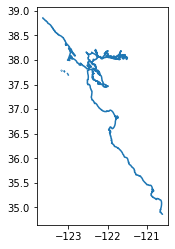

In [16]:
if not roi_coast.empty:
    roi_coast.plot()
else:
    print("ERROR.\nThe bounding box provided did not intersect with the coastline vector provided.")

In [17]:
vector_within_bounding_box_json=roi_coast.to_json()
res = json.loads(vector_within_bounding_box_json)
geo_json_vector = GeoJSON(
    data=res,
    style={
        'color':'yellow','fill_color':'yellow' ,'opacity': 1, 'dashArray': '0', 'fillOpacity': 0.5, 'weight': 4
    },
    hover_style={
        'color': 'white', 'dashArray': '4', 'fillOpacity': 0.7
    },
)
m.add_layer(geo_json_vector)
m

Map(bottom=6500.0, center=[40.04443758460859, -119.61914062500001], controls=(ZoomControl(options=['position',…